In [ ]:
#Installing Libraries

!pip install TextBlob


import os
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import *
from sklearn.feature_extraction.text import CountVectorizer

from google.colab import drive
drive.mount('/content/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Mounted at /content/gdrive


In [ ]:
#Importing the dataset into a dataframe

data = pd.read_csv('/content/gdrive/MyDrive/NLP Project/Womens Clothing E-Commerce Reviews.csv',index_col =[0])
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data.shape # Dimensions of the dataset

(23486, 10)

In [ ]:
data.isnull().sum()/len(data)*100 #Percentage NULL Values in the dataset

Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
data.drop(labels =['Clothing ID','Title'],axis = 1,inplace = True) #Dropping unwanted columns
data[data['Review Text'].isnull()]

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,23,NaN,5,1,0,General Petite,Tops,Knits
93,31,NaN,5,1,0,General,Dresses,Dresses
98,50,NaN,5,1,0,General,Jackets,Outerwear
135,35,NaN,4,1,0,General Petite,Tops,Knits
142,35,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...
23258,35,NaN,4,1,0,General,Tops,Knits
23301,52,NaN,5,1,0,General,Tops,Knits
23303,46,NaN,5,1,0,General,Tops,Blouses
23470,39,NaN,5,1,0,General Petite,Dresses,Dresses


In [ ]:
data = data[~data['Review Text'].isnull()]  #Dropping columns which don't have any review

In [ ]:
data.shape #Final dimensions of the dataset

(22641, 8)

In [ ]:
px.histogram(data, x = 'Age') # Histogram plot of the reviews Count vs Age

In [ ]:
px.histogram(data, x = data['Rating']) # Histogram plot of the reviews Count vs Ratings

In [ ]:
px.histogram(data, x = data['Class Name']) # Histogram plot of the reviews Count vs Class Name
 

In [ ]:
#Scatter Plot of Age vs Positive Feedback count with Recommened IND as facet_row
px.scatter(data, x="Age", y="Positive Feedback Count", facet_row="Recommended IND", facet_col="Rating",trendline="ols",category_orders={"Rating": [1,2,3,4,5],'Recommended IND':[0,1]})


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#Violin Plot of Age vs Department Name
px.violin(data, x="Age", y="Department Name", orientation="h", color="Recommended IND")


In [ ]:
#Box Plot of Age vs Division Name
px.box(data, x="Age", y="Division Name", orientation="h",color = 'Recommended IND')


In [ ]:
err1 = data['Review Text'].str.extractall("(&amp)")
err2 = data['Review Text'].str.extractall("(\xa0)")

print('with &amp',len(err1[~err1.isna()]))
print('with (\xa0)',len(err2[~err2.isna()]))

with &amp 37
with ( ) 6


In [ ]:
data['Review Text'] = data['Review Text'].str.replace('(&amp)','')
data['Review Text'] = data['Review Text'].str.replace('(\xa0)','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
err1 = data['Review Text'].str.extractall("(&amp)")
print('with &amp',len(err1[~err1.isna()]))
err2 = data['Review Text'].str.extractall("(\xa0)")
print('with (\xa0)',len(err2[~err2.isna()]))

with &amp 0
with ( ) 0


In [ ]:
#Caclulating the sentiment of each Review from the review text using TextBlob a library built upon NLTK
#The polarity column added to the dataset

data['polarity'] = data['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)


In [ ]:
data['polarity']


0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: polarity, Length: 22641, dtype: float64

In [ ]:
px.histogram(data, x = 'polarity') # Histogram plot of the reviews Count vs Polarity


In [ ]:
px.box(data, y="polarity", x="Department Name", orientation="v",color = 'Recommended IND')


In [ ]:
data['review_len'] = data['Review Text'].astype(str).apply(len)


In [ ]:
px.histogram(data, x = 'review_len')


In [ ]:
data['token_count'] = data['Review Text'].apply(lambda x: len(str(x).split()))


In [ ]:
px.histogram(data, x = 'token_count')


In [ ]:
sam = data.loc[data.polarity == 1,['Review Text']].sample(3).values


In [ ]:
#Sample Positive Reviews

for i in sam:
    print(i[0])

This is the perfect holiday dress. my best purchase of the season!
Great dress for vacations!
Great purchase! i bought the coat to wear to work.


In [ ]:
sam = data.loc[data.polarity == 0.5,['Review Text']].sample(3).values


In [ ]:
#Sample Neutral Reviews
for i in sam:
    print(i[0])

Fits like a maternity top. not for my age group or build.
I love the neckline with the pleated ruffles and tie. it's graceful and distinctive yet still understated.
Love these jeans.


In [ ]:
sam = data.loc[data.polarity < 0,['Review Text']].sample(3).values


In [ ]:
#Sample Negative Reviews
for i in sam:
    print(i[0])

Cute and very soft, but the elastic wasn't sewn in right. i took them out of the wash and the waistband was a twisted mess. disappointing for more expensive loungewear.
I've purchased pilcro jeans in the past and they've held up great. unfortunately, the material used for this particular jean is a far, far cry from what it used to be. the thighs of these jeans start pilling (yes pilling!) after just a few wears. i've never had jeans do this -- whatever denim blend they are using is a complete disaster.

don't buy these -- you will be very disappointed.
The material is a medium weight jersey knit that is slightly thicker so it provides enough coverage and support to be flattering without being bulky. i think this dress is true-to-size, or maybe runs a little bit big, but only by a little bit. i bought a medium and am a size 8 in tops and 10 in pants. the dress hugs nicely on the upper body (arms, chest, ribs) and flares just a little bit on the hips/tummy/butt area. it is forgiving of l

In [ ]:
negative = (len(data.loc[data.polarity < 0,['Review Text']].values)/len(data))*100
positive = (len(data.loc[data.polarity > 0.3,['Review Text']].values)/len(data))*100
neutral  = len(data.loc[data.polarity > 0 ,['Review Text']].values) - len(data.loc[data.polarity > 0.3 ,['Review Text']].values)
neutral = neutral/len(data)*100

([<matplotlib.patches.Wedge at 0x7fd733179b50>,
 [Text(0.49407720331717064, 0.9827958674934909, 'Positive'),
  Text(-0.8067541043782851, 0.7477618705636115, 'Negative'),
  Text(-0.30572586454558104, -1.0566606341431752, 'Neutral')])

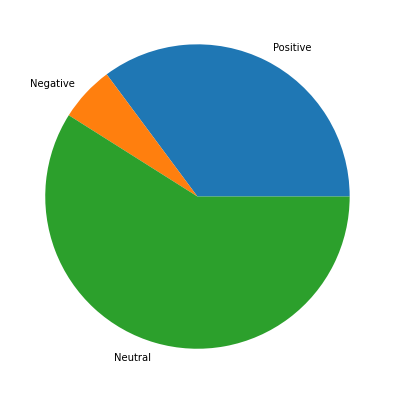

In [ ]:
from matplotlib import pyplot as plt 
plt.figure(figsize =(10, 7)) 
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral']) 

In [ ]:
#Function to calculate the top N ngrams of the corpus after removing the stopwords

def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

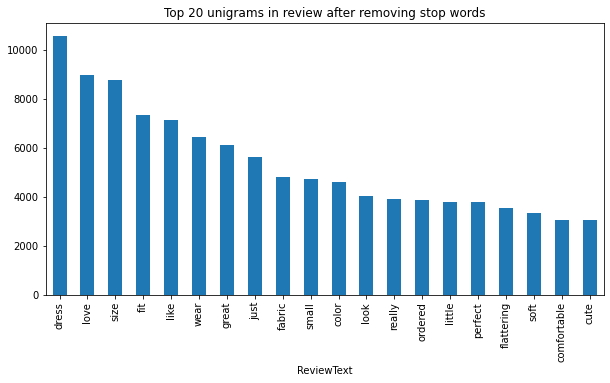

In [ ]:
common_words = top_n_ngram(data['Review Text'], 20,1)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

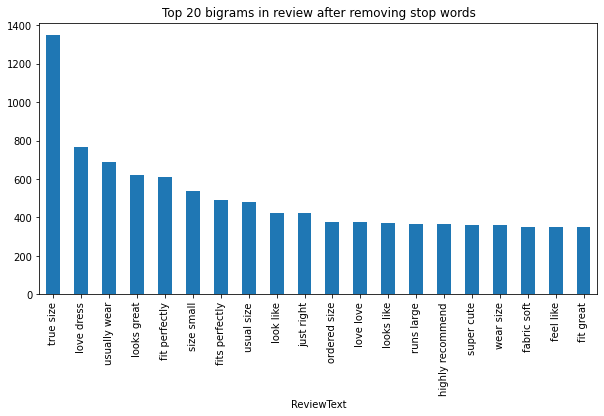

In [ ]:
common_words = top_n_ngram(data['Review Text'], 20,2)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in review after removing stop words')

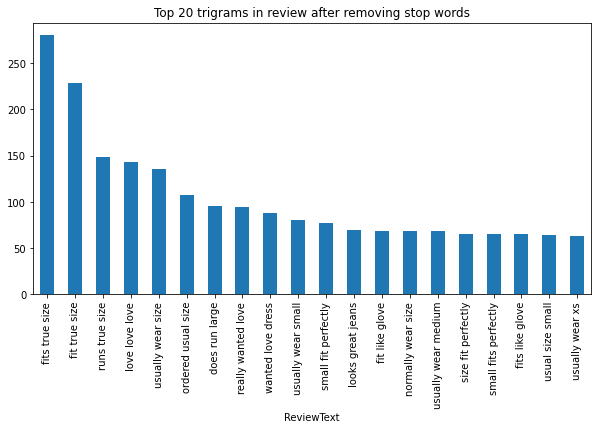

In [ ]:
common_words = top_n_ngram(data['Review Text'], 20,3)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 trigrams in review after removing stop words')

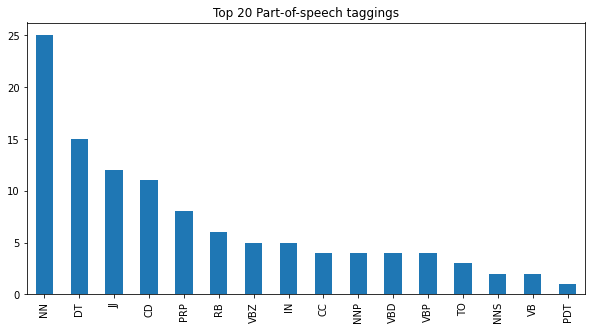

In [ ]:
blob = TextBlob(str(data['Review Text']))
pos = pd.DataFrame(blob.tags,columns = ['word','pos'])
pos1 = pos.pos.value_counts()[:20]
plt.figure(figsize = (10,5))
pos1.plot(kind='bar',title ='Top 20 Part-of-speech taggings')

In [ ]:
y = data['Recommended IND']
X = data.drop(columns = 'Recommended IND')


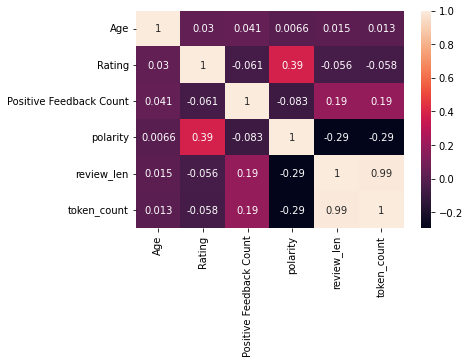

In [ ]:
sns.heatmap(X.corr(),annot =True)


In [ ]:
set1 = set()
cor = X.corr()
for i in cor.columns:
    for j in cor.columns:
        if cor[i][j] > 0.8 and i != j:
            set1.add(i)
print(set1)

{'token_count', 'review_len'}


In [ ]:
X = X.drop(labels = ['token_count'],axis = 1)
X.corr()


,Age,Rating,Positive Feedback Count,polarity,review_len
Age,1.000000,0.029962,0.040850,0.006649,0.014954
Rating,0.029962,1.000000,-0.060984,0.386303,-0.056190
Positive Feedback Count,0.040850,-0.060984,1.000000,-0.083379,0.191214
polarity,0.006649,0.386303,-0.083379,1.000000,-0.290695
review_len,0.014954,-0.056190,0.191214,-0.290695,1.000000


In [ ]:
class1 = []
for i in X.polarity:
    if float(i) >= 0.0:
        class1.append(1)
    elif float(i) < 0.0:
        class1.append(0)
X['sentiment'] = class1

In [ ]:
X.groupby(X['sentiment']).describe().T


sentiment                                 0             1
Age                     count  1.322000e+03  21319.000000
                        mean   4.308850e+01     43.292274
                        std    1.197634e+01     12.348570
                        min    2.000000e+01     18.000000
                        25%    3.425000e+01     34.000000
                        50%    4.100000e+01     41.000000
                        75%    5.100000e+01     52.000000
                        max    9.400000e+01     99.000000
Rating                  count  1.322000e+03  21319.000000
                        mean   2.919062e+00      4.261973
                        std    1.349107e+00      1.050732
                        min    1.000000e+00      1.000000
                        25%    2.000000e+00      4.000000
                        50%    3.000000e+00      5.000000
                        75%    4.000000e+00      5.000000
                        max    5.000000e+00      5.000000
Positive Feedback Count count  1.322000e+03  21319.000000
                        mean   3.177761e+00      2.596651
                        std    6.810800e+00      5.715044
                        min    0.000000e+00      0.000000
                        25%    0.000000e+00      0.000000
                        50%    1.000000e+00      1.000000
                        75%    3.000000e+00      3.000000
                        max    1.080000e+02    122.000000
polarity                count  1.322000e+03  21319.000000
                        mean  -9.423922e-02      0.271159
                        std    1.042942e-01      0.157102
                        min   -9.750000e-01      0.000000
                        25%   -1.250000e-01      0.158889
                        50%   -6.250000e-02      0.250000
                        75%   -2.658820e-02      0.358333
                        max   -1.734723e-18      1.000000
review_len              count  1.322000e+03  21319.000000
                        mean   2.956218e+02    309.490924
                        std    1.412213e+02    144.071555
                        min    1.100000e+01      9.000000
                        25%    1.782500e+02    187.000000
                        50%    2.825000e+02    303.000000
                        75%    4.247500e+02    461.000000
                        max    5.060000e+02    508.000000

In [ ]:
#Creating a corpus, defining a Regular Expression , Stemming, Stopword Removal and Finalised the Corpus

corpus = []
X.index = np.arange(len(X))

for i in range(len(X)):
    review = re.sub('[^a-zA-z]',' ',X['Review Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review =[ps.stem(i) for i in review if not i in set(stopwords.words('english'))]
    review =' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['absolut wonder silki sexi comfort',
 'love dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit',
 'high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c',
 'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment',
 'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt',
 'love traci rees dress one petit feet tall usual wear p brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten narrow skirt would take away embellish garment love color idea style work return dress',
 'ade basket hte last mintu see would look like person store pick went teh darkl

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv  = CV(max_features = 3000,ngram_range=(1,1))
X_cv = cv.fit_transform(corpus).toarray()
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8734820048575844


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as TV
tv  = TV(ngram_range =(1,1),max_features = 3000)
X_tv = tv.fit_transform(corpus).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.837491720026496


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 3000)
tokenizer.fit_on_texts(corpus)

sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, padding='post')

word_index = tokenizer.word_index
count = 0
for i,j in word_index.items():
    if count == 11:
        break
    print(i,j)
    count = count+1

dress 1
fit 2
love 3
size 4
look 5
top 6
wear 7
like 8
color 9
great 10
would 11


In [ ]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(padded,y,epochs= num_epochs)

Epoch 1/10
708/708 [==============================] - 4s 4ms/step - loss: 0.4402 - accuracy: 0.8198
Epoch 2/10
708/708 [==============================] - 3s 4ms/step - loss: 0.2679 - accuracy: 0.8857
Epoch 3/10
708/708 [==============================] - 3s 4ms/step - loss: 0.2369 - accuracy: 0.9017
Epoch 4/10
708/708 [==============================] - 3s 4ms/step - loss: 0.2244 - accuracy: 0.9072
Epoch 5/10
708/708 [==============================] - 3s 4ms/step - loss: 0.2153 - accuracy: 0.9118
Epoch 6/10
708/708 [==============================] - 3s 4ms/step - loss: 0.2078 - accuracy: 0.9143
Epoch 7/10
708/708 [==============================] - 3s 4ms/step - loss: 0.2010 - accuracy: 0.9187
Epoch 8/10
708/708 [==============================] - 3s 4ms/step - loss: 0.1944 - accuracy: 0.9208
Epoch 9/10
708/708 [==============================] - 3s 4ms/step - loss: 0.1889 - accuracy: 0.9239
Epoch 10/10
708/708 [==============================] - 3s 4ms/step - loss: 0.1833 - accuracy: 0.9258

In [ ]:
sample_string = "I am disappointed !!"
sample = tokenizer.texts_to_sequences(sample_string)
padded_sample = pad_sequences(sample, padding='post')

In [ ]:
padded_sample.T

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,  252,  252,
           0,    0, 1376,    0, 1114,    0,    0,    0,    0]],
      dtype=int32)

In [ ]:
model.predict(padded_sample.T)

array([[0.99919397]], dtype=float32)